In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
#用karas有的数据集imdb，电影分类,分电影是积极的，还是消极的
imdb = keras.datasets.imdb
#载入数据使用下面两个参数
vocab_size = 10000  #词袋
index_from = 3
#前一万个词出现词频最高的会保留下来进行处理，后面的作为特殊字符处理，
# 小于3的id都是特殊字符，下面代码有写
# 需要注意的一点是取出来的词表还是从1开始的，需要做处理
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = vocab_size, index_from = index_from)

In [9]:
#train_data每个样本都是一个向量，
# train_labels的每个样本都是一个值，0或者1
# label为pos(positive) 1和neg(negative) 0。
print(train_data[0], train_labels[0])
print('-'*50)
#两个形状,train_data.shape显示的只有一维，是因为另外一维是变长的
print(train_data.shape, train_labels.shape)
# #打印第一个样本，第二个样本长度，可以看出是变长的，变长我们要把它都变为一样的长度
print(len(train_data[0]), len(train_data[1]))
print(type(train_data))
print(type(train_labels))

print(np.unique(train_labels))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1
--------------------------------------------------
(25000,

In [28]:
print(test_data.shape, test_labels.shape)

(25000,) (25000,)


In [11]:
#载入词表，看下词表长度，词表就像英语字典
word_index = imdb.get_word_index()
print(len(word_index))
print(type(word_index))


88584
<class 'dict'>


In [15]:
#为什么要翻过来，是因为原来的key，是单词，是一个字符串，而value是数值
reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()])
print(type(reverse_word_index))
reverse_word_index.get(4)

<class 'dict'>


'of'

In [16]:
# 需要注意的一点是取出来的词表还是从1开始的，需要做处理，偏移3
word_index = {k:(v+3) for k, v in word_index.items()}

In [17]:
#小于3的id都是特殊字符，下面的代码中给这些id的意义做了明确，因为我们做了偏移，因此
#对于这些多余槽位我们给与新的释义
word_index['<PAD>'] = 0   # 做padding时，我们来填充的字符
word_index['<START>'] = 1  #起始
word_index['<UNK>'] = 2  #找不到就返回UNK
word_index['<END>'] = 3  #每个句子末尾

reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()])


def decode_review(text_ids):
    return ' '.join(
        [reverse_word_index.get(word_id, "<UNK>") for word_id in text_ids])
#有了reverse我们可以反向转回来看看这句话是什么，就是把数字解释为了真实的文本
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [18]:
#长度低于500会被补全，高于500会被截断
max_length = 500

#pad_sequences用来做padding
train_data = keras.preprocessing.sequence.pad_sequences(
    train_data, # list of list
    value = word_index['<PAD>'],#填充啥内容
    padding = 'post', # pre，post padding的顺序，一个是放前面，一个是后面
    maxlen = max_length)

#对应test一样的
test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, # list of list
    value = word_index['<PAD>'],
    padding = 'post', # post, pre
    maxlen = max_length)

print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [25]:
print(train_data.shape)

(25000, 500)


In [19]:
#embedding_dim，每个词的向量维度是16
embedding_dim = 16
batch_size = 128

model = keras.models.Sequential([
    # 1. define matrix: [vocab_size, embedding_dim]
    # 2. [1,2,3,4..], max_length * embedding_dim
    # 3. batch_size * max_length * embedding_dim  最后变为，具体看文档
    keras.layers.Embedding(vocab_size, embedding_dim,
                           input_length = max_length),
    # GlobalAveragePooling1D是把batch_size * max_length * embedding_dim 
    #   -> batch_size * embedding_dim，消除维度max_length，具体看文档
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])
#160000 是vocab_size*embedding_dim的结果
#1088 是embedding_dim*64+64得到的结果  wx+b
#65是 w*1+1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 161,153
Trainable params: 161,153
Non-trainable params: 0
_________________________________________________________________


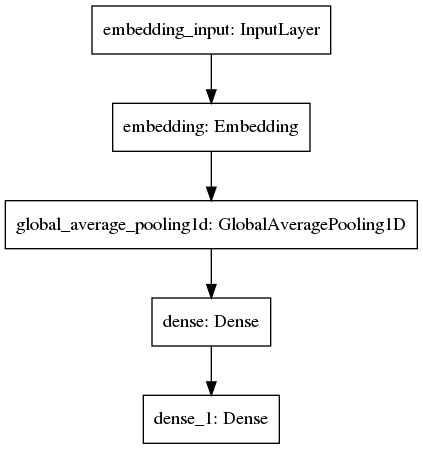

In [21]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [20]:
model.variables

[<tf.Variable 'embedding/embeddings:0' shape=(10000, 16) dtype=float32, numpy=
 array([[ 0.02264449,  0.02724223,  0.02184233, ..., -0.00235584,
          0.01283182,  0.02639847],
        [ 0.02880767,  0.00998914, -0.04588976, ..., -0.04171804,
         -0.02006204,  0.0030757 ],
        [-0.03154596, -0.00507609,  0.0240149 , ..., -0.0005937 ,
         -0.03355   ,  0.03648174],
        ...,
        [-0.00420018,  0.01013697, -0.02400061, ...,  0.00668845,
          0.04957905, -0.03084349],
        [ 0.04908044,  0.00236279,  0.02080301, ..., -0.02512975,
         -0.00049678,  0.01515836],
        [ 0.02694288,  0.03374419, -0.0471325 , ...,  0.03998077,
          0.02177754, -0.0141641 ]], dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(16, 64) dtype=float32, numpy=
 array([[-0.22561224,  0.07180712, -0.22884695, ...,  0.20348972,
          0.17238057,  0.24070042],
        [ 0.13347471,  0.19383606,  0.19722766, ...,  0.08189479,
          0.16012123, -0.1322933 ],
      

In [22]:
history = model.fit(train_data, train_labels,
                    epochs = 30,
                    batch_size = batch_size,
                    validation_split = 0.2)


Epoch 1/30
157/157 [==============================] - 2s 12ms/step - loss: 0.6796 - accuracy: 0.6261 - val_loss: 0.6313 - val_accuracy: 0.7744
Epoch 2/30
157/157 [==============================] - 1s 10ms/step - loss: 0.5142 - accuracy: 0.8246 - val_loss: 0.4133 - val_accuracy: 0.8474
Epoch 3/30
157/157 [==============================] - 2s 12ms/step - loss: 0.3419 - accuracy: 0.8788 - val_loss: 0.3311 - val_accuracy: 0.8754
Epoch 4/30
157/157 [==============================] - 2s 13ms/step - loss: 0.2710 - accuracy: 0.9021 - val_loss: 0.3046 - val_accuracy: 0.8838
Epoch 5/30
157/157 [==============================] - 2s 12ms/step - loss: 0.2317 - accuracy: 0.9169 - val_loss: 0.2890 - val_accuracy: 0.8874
Epoch 6/30
157/157 [==============================] - 3s 18ms/step - loss: 0.2046 - accuracy: 0.9251 - val_loss: 0.2820 - val_accuracy: 0.8908
Epoch 7/30
157/157 [==============================] - 2s 13ms/step - loss: 0.1823 - accuracy: 0.9355 - val_loss: 0.2821 - val_accuracy: 0.8944

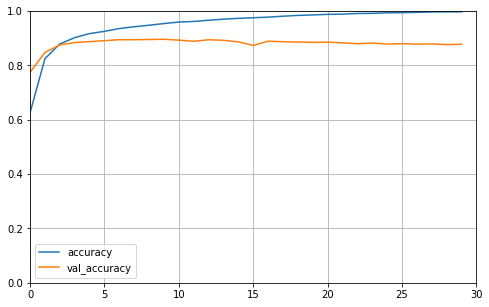

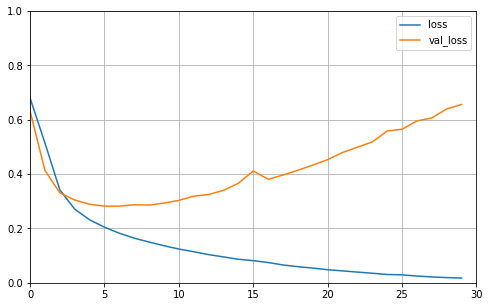

In [26]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', 30, 0, 1)
plot_learning_curves(history, 'loss', 30, 0, 1)
#可以看出我们loss发生了过拟合

In [27]:
model.evaluate(
    test_data, test_labels,
    batch_size = batch_size,
    verbose = 0)

[0.7066338062286377, 0.8586000204086304]

In [24]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
# The model will take as input an integer matrix of size (batch,
# input_length), and the largest integer (i.e. word index) in the input
# should be no larger than 999 (vocabulary size).
# Now model.output_shape is (None, 10, 64), where `None` is the batch
# dimension.
input_array = np.random.randint(1000, size=(32, 10))
model1.compile('rmsprop', 'mse')
output_array = model1.predict(input_array)
print(output_array.shape)

(32, 10, 64)
